In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import umap
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA, KernelPCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# iris
iris_train = pd.read_csv('data/preprocessed_data/iris_train.zip', compression='zip')
iris_test = pd.read_csv('data/preprocessed_data/iris_test.zip', compression='zip')

train_target = iris_train['Species'].values
iris_train = iris_train.drop(columns=['Species'], axis = 1)

test_target = iris_test['Species'].values
iris_test = iris_test.drop(columns=['Species'], axis = 1)

In [3]:
reduction_names = ['UMAP', 'PCA', 'KPCA']
dim_num = 2
reductions = [
    umap.UMAP(n_components = dim_num),
    PCA(n_components=dim_num),
    KernelPCA(n_components=dim_num, kernel='rbf')
]

classifieres_names = ['RBF SVM', 'Nearest Neighbors', 'Naive Bayes']
classifieres = [
    SVC(gamma='scale', C=1),
    KNeighborsClassifier(3),
    GaussianNB()
]


UMAP
RBF SVM
Nearest Neighbors
Naive Bayes
PCA
RBF SVM
Nearest Neighbors
Naive Bayes
KPCA
RBF SVM
Nearest Neighbors
Naive Bayes


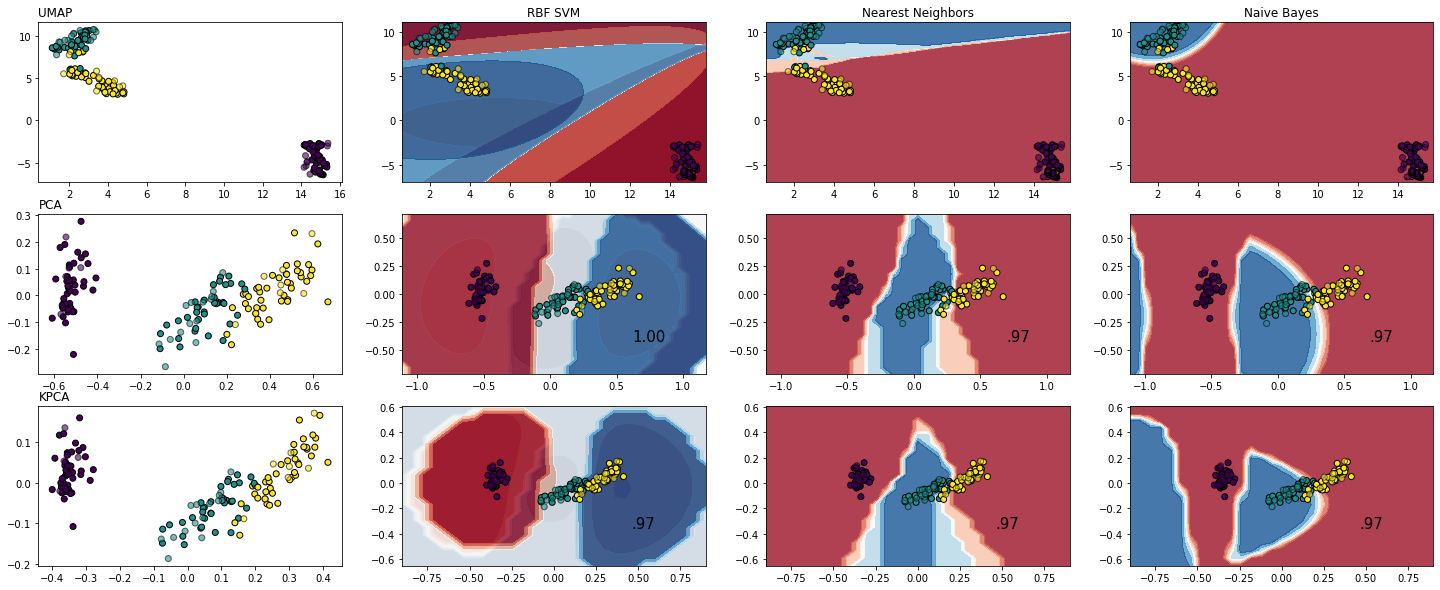

In [4]:
figure = plt.figure(figsize=(25, 10))
i = 1
h = 0.06
for r_name, reduction in zip(reduction_names, reductions):
    print(r_name)
    train_reducted = reduction.fit_transform(iris_train)
    test_reduces = reduction.transform(iris_test)

    x_min, x_max = train_reducted[:, 0].min() - .5, train_reducted[:, 0].max() + .5
    y_min, y_max = train_reducted[:, 1].min() - .5, train_reducted[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    ax = plt.subplot(len(reductions), len(classifieres) + 1, i)
    ax.set_title(r_name, loc='left')
    # train data
    ax.scatter(train_reducted[:, 0], train_reducted[:, 1], c=train_target, edgecolors='k')
    # test data
    ax.scatter(test_reduces[:, 0], test_reduces[:, 1], c=test_target, alpha=0.6, edgecolors='k')
    i += 1

    for classifier_name, clf in zip(classifieres_names, classifieres):
        print(classifier_name)
        ax = plt.subplot(len(reductions), len(classifieres) + 1, i)
        if i <= (len(classifieres) + 1):
            ax.set_title(classifier_name)

        clf.fit(train_reducted, train_target)
        # target_predicted = classifier.predict(test_target)
        score = clf.score(test_reduces, test_target)
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            for j in range(Z.shape[1]):
                Z_c = Z[:, j]
                Z_c = Z_c.reshape(xx.shape)
                ax.contourf(xx, yy, Z_c, cmap=cm, alpha=.8)
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # print(f'{Z.shape} - {xx.shape}')
        # print(Z)
        # print('---------------------------------')
        

        # Plot the training points
        ax.scatter(train_reducted[:, 0], train_reducted[:, 1], c=train_target, edgecolors='k')
        # Plot the testing points
        ax.scatter(test_reduces[:, 0], test_reduces[:, 1], c=test_target, edgecolors='k', alpha=0.6)

        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1